In [1]:
#!pip install pytse_client

In [2]:
import pytse_client as tse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
#Download data from TSE Site
data = tse.download(symbols=["کچاد"],include_jdate= True,adjust = False) #adjust = True :قیمت تعدیل یافته سهم

In [4]:
df=data['کچاد']

In [5]:
#adding 26 empty row at end of dataframe
emptydf=pd.DataFrame(index=range(df.index.stop,df.index.stop+26))
df=df.append(emptydf)

In [7]:
df.tail(10)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate
3936,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3937,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3938,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3939,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3940,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3941,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3942,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3943,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3944,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3945,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
type(df),type(data)

(pandas.core.frame.DataFrame, dict)

In [9]:
df.describe()

,open,high,low,adjClose,value,volume,count,yesterday,close
count,3920.000000,3920.000000,3920.000000,3920.000000,3.920000e+03,3.920000e+03,3920.000000,3920.000000,3920.000000
mean,8226.717602,8345.408418,8092.629847,8230.701786,5.158575e+10,5.230742e+06,737.765306,8216.261224,8214.017602
std,6175.393359,6295.218325,6059.015414,6166.564687,1.463353e+11,1.125692e+07,1525.161103,6157.447511,6174.619014
min,1446.000000,1476.000000,1434.000000,1469.000000,2.420000e+04,1.000000e+01,1.000000,0.000000,1446.000000
25%,4657.750000,4710.000000,4580.000000,4681.750000,2.038455e+09,3.500200e+05,101.000000,4658.250000,4639.500000
50%,6400.000000,6470.000000,6310.000000,6396.000000,7.136477e+09,1.256962e+06,234.000000,6394.500000,6387.000000
75%,9655.500000,9701.750000,9500.000000,9589.000000,3.063831e+10,5.014622e+06,677.750000,9585.250000,9589.000000
max,31400.000000,31660.000000,30980.000000,31220.000000,2.520421e+12,2.270000e+08,31506.000000,31220.000000,31300.000000


In [10]:
#Tenkan-sen = (max-9-period high + min-9-period low) / 2
#, min_periods = 0
tenkan_max = df['high'].rolling(window = 9).max()
tenkan_min = df['low'].rolling(window = 9).min()
df['tenkan_sen'] = (tenkan_max + tenkan_min) / 2


In [11]:
#Kijun-sen = (max-26-period high + min-26-period low) / 2
kijun_max = df['high'].rolling(window = 26).max()
kijun_min = df['low'].rolling(window = 26).min()
df['kijun_sen'] = (kijun_max + kijun_min) / 2


In [12]:
#Senkou Span A = (Tenkan-sen + Kijun-sen) / 2
#(Kijun + Tenkan) / 2 Shifted ahead by 26 periods
df['senkou_a'] = ((df['kijun_sen'] + df['tenkan_sen']) / 2).shift(26)


In [13]:
#Senkou Span B = (max-52-period high + max-52-period low) / 2
#52 period High + Low / 2
senkou_b_max = df['high'].rolling(window = 52).max()
senkou_b_min = df['low'].rolling(window = 52).min()
df['senkou_b'] = ((senkou_b_max + senkou_b_min) / 2).shift(26)

In [14]:
df.tail(30)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate,tenkan_sen,kijun_sen,senkou_a,senkou_b
3916,2022-02-14,29950.0,29950.0,29520.0,29700.0,9.022014e+10,3037965.0,663.0,29690.0,29750.0,1400-11-25,29225.0,28175.0,29700.0,28955.0
3917,2022-02-16,29700.0,29800.0,29330.0,29670.0,3.553770e+10,1200372.0,657.0,29700.0,29700.0,1400-11-27,29225.0,28175.0,29730.0,28955.0
3918,2022-02-19,29650.0,29890.0,28930.0,29600.0,5.280561e+10,1789288.0,914.0,29670.0,29430.0,1400-11-30,29105.0,28175.0,29740.0,28955.0
3919,2022-02-20,29650.0,29650.0,29560.0,29600.0,1.513464e+11,5113638.0,1069.0,29600.0,29590.0,1400-12-01,29465.0,28175.0,29755.0,28955.0
3920,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29755.0,28955.0
3921,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29662.5,28955.0
3922,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29662.5,28955.0
3923,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29620.0,28955.0
3924,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29350.0,28955.0
3925,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29027.5,28955.0


In [15]:
#Chikou Span = Close plotted 26 periods in the past
#Current close shifted -26
df['chikou'] = (df['close']).shift(-26)


In [16]:
df.tail(30)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate,tenkan_sen,kijun_sen,senkou_a,senkou_b,chikou
3916,2022-02-14,29950.0,29950.0,29520.0,29700.0,9.022014e+10,3037965.0,663.0,29690.0,29750.0,1400-11-25,29225.0,28175.0,29700.0,28955.0,NaN
3917,2022-02-16,29700.0,29800.0,29330.0,29670.0,3.553770e+10,1200372.0,657.0,29700.0,29700.0,1400-11-27,29225.0,28175.0,29730.0,28955.0,NaN
3918,2022-02-19,29650.0,29890.0,28930.0,29600.0,5.280561e+10,1789288.0,914.0,29670.0,29430.0,1400-11-30,29105.0,28175.0,29740.0,28955.0,NaN
3919,2022-02-20,29650.0,29650.0,29560.0,29600.0,1.513464e+11,5113638.0,1069.0,29600.0,29590.0,1400-12-01,29465.0,28175.0,29755.0,28955.0,NaN
3920,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29755.0,28955.0,NaN
3921,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29662.5,28955.0,NaN
3922,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29662.5,28955.0,NaN
3923,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29620.0,28955.0,NaN
3924,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29350.0,28955.0,NaN
3925,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29027.5,28955.0,NaN


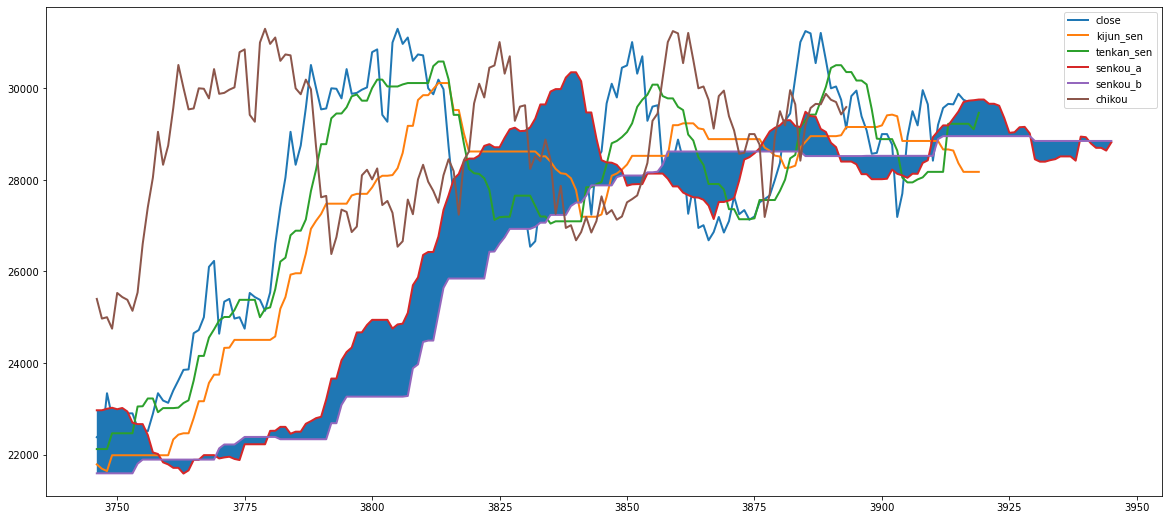

In [17]:
#Plotting Ichimoku
tmp = df[['close','kijun_sen','tenkan_sen','senkou_a','senkou_b','chikou']].tail(200)
fig,ax = plt.subplots(1,1,sharex=True,figsize = (20,9)) #share x axis and set a figure size
ax.plot(tmp,label=tmp.columns,linewidth=2) # plot Close with index on x-axis with a line thickness of 4
ax.fill_between(tmp.index, tmp.senkou_a, tmp.senkou_b)
ax.legend()

In [18]:
tmp

,close,kijun_sen,tenkan_sen,senkou_a,senkou_b,chikou
3746,22380.0,21785.0,22120.0,22967.5,21590.0,25400.0
3747,22300.0,21690.0,22120.0,22967.5,21590.0,24970.0
3748,23340.0,21640.0,22120.0,23000.0,21590.0,25000.0
3749,22820.0,21985.0,22465.0,23022.5,21590.0,24750.0
3750,22800.0,21985.0,22465.0,22990.0,21590.0,25530.0
...,...,...,...,...,...,...
3941,NaN,NaN,NaN,28795.0,28850.0,NaN
3942,NaN,NaN,NaN,28700.0,28850.0,NaN
3943,NaN,NaN,NaN,28700.0,28850.0,NaN
3944,NaN,NaN,NaN,28640.0,28850.0,NaN
